In [193]:
# Linearly separable / 2d binary class 를 가지고 있는 서로 다른 data point class 별로 100개씩 생성하고 랜덤하게 70%는 train / 30% 는 test 셋으로 분리

import numpy as np

mean_a = [1, 1]
cov_a = [[1.5,0], [0,1.5]]
mean_b = [-1, -1]
cov_b = [[1.5,0], [0,1.5]]

a = np.random.multivariate_normal(mean_a, cov_a, 100)
b = np.random.multivariate_normal(mean_b, cov_b, 100)

from sklearn.model_selection import train_test_split

X = np.vstack((a, b))
y = np.concatenate((np.ones(100), np.zeros(100)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 2)
(60, 2)
(140,)
(60,)


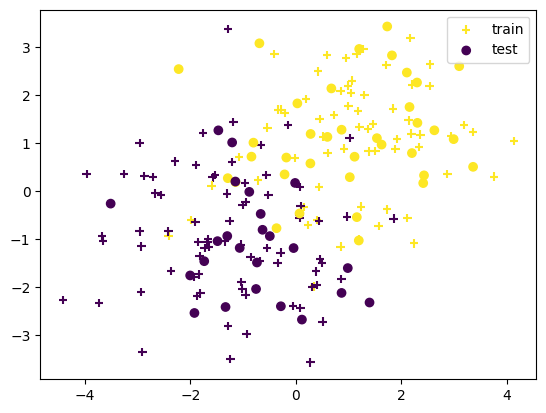

In [194]:

# 2d visualization을 통하여 실제로 linearly separable한 data인지 확인할 수 있는 scatter plot을 생성하시오.
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],marker = '+', c=y_train, label = 'train')
plt.scatter(X_test[:,0],X_test[:,1],marker = 'o', c=y_test, label = 'test')
plt.legend()
plt.show()




In [195]:
# training data를 사용하여 perceptron을 training 하고 train accuracy / test accuracy 를 작성하시오.

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1] + 1)
        X = np.insert(X, 0, 1, axis=1)

        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.w) > 0
            self.w += self.learning_rate * np.dot(X.T, y - y_pred)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = np.dot(X, self.w) > 0
        return y_pred.astype(int)

    def score(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = np.dot(X, self.w) > 0
        return np.mean(y == y_pred)



model = Perceptron(learning_rate=0.1, epochs = 100)
model.fit(X_train, y_train)
train_acc = model.score(X_train,y_train)
test_acc = model.score(X_test, y_test)

print(f'Train accuracy : {train_acc*100}%')
print(f'Test accuracy : {test_acc*100}%')



Train accuracy : 87.85714285714286%
Test accuracy : 86.66666666666667%


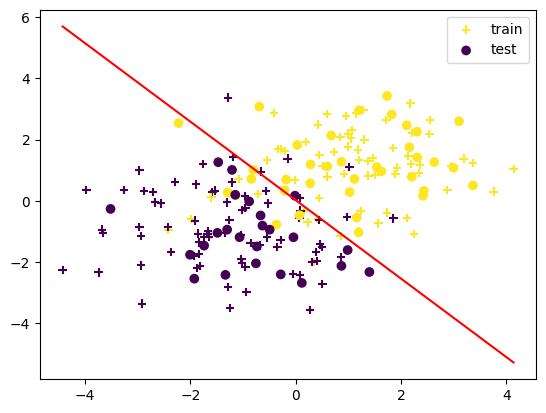

In [196]:
# Perceptron의 decision boundary와 data를 2d 상에서 확인할 수 있도록 plot을 생성하시오.

plt.scatter(X_train[:,0],X_train[:,1],marker = '+', c=y_train, label = 'train')
plt.scatter(X_test[:,0],X_test[:,1],marker = 'o', c=y_test, label = 'test')
plt.legend()

w = model.w
x1 = np.linspace(X[:,0].min(), X[:,0].max(),100)
x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1,x2, 'r-', label = 'decision boundary')
plt.show()


2번문제

In [197]:
# import 

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split

In [198]:
# XOR 형태의 Non-linearly separable 2d binary class 를 가지고 있는 서로 다른 data point class 별로 100개씩 생성하고
# 랜덤하게 70 %는train / 30%는 test 셋으로 분리하시오.

np.random.seed(123)
X = np.random.randn(200, 2)
X[:, 0] *= -1
X[:, 1] *= -1
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1,0 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(140, 2)
(60, 2)
(140,)
(60,)


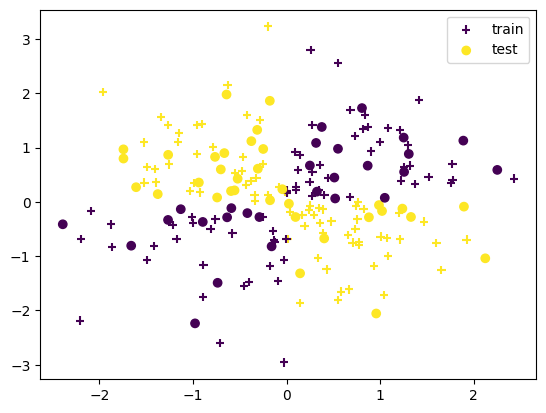

In [199]:
# 2d visualization을 통하여 실제로 linearly separable한 data인지 확인할 수 있는 plot을 생성하시오.
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],X_train[:,1],marker = '+', c=y_train, label = 'train')
plt.scatter(X_test[:,0],X_test[:,1],marker = 'o', c=y_test, label = 'test')
plt.legend()
plt.show()




In [200]:
# training data를 사용하여 위에서 구현한 perceptron으로 training 하고 train/ test accuracy 작성하시오.
model_p = Perceptron(learning_rate=0.1, epochs = 100)
model_p.fit(X_train, y_train)
train_acc = model_p.score(X_train,y_train)
test_acc = model_p.score(X_test, y_test)

print(f'Train accuracy : {train_acc*100}%')
print(f'Test accuracy : {test_acc*100}%')



Train accuracy : 52.85714285714286%
Test accuracy : 55.00000000000001%


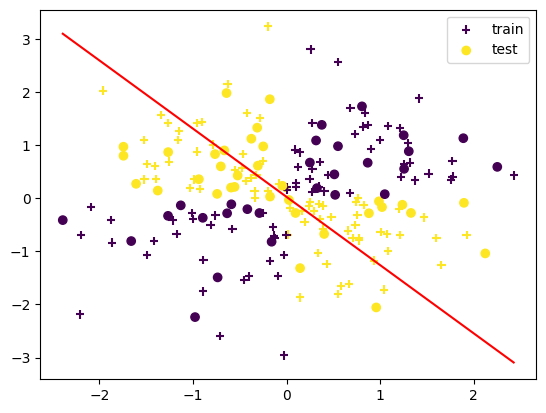

In [201]:
# Perceptron의 decision boundary와 data를 2d 상에서 확인할 수 있도록 plot을 생성하시오.
# 문제 순서상 뒤에 있지만, Perceptron 구현하고 바로 decision boundary를 그려 확인하였습니다.

plt.scatter(X_train[:,0],X_train[:,1],marker = '+', c=y_train, label = 'train')
plt.scatter(X_test[:,0],X_test[:,1],marker = 'o', c=y_test, label = 'test')
plt.legend()

w = model.w
x1 = np.linspace(X[:,0].min(), X[:,0].max(),100)
x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1,x2, 'r-', label = 'decision boundary')
plt.show()

배운 대로 perceptron은 XOR 문제를 해결하지 못하는 것을 확인할 수 있다.

In [202]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()  # use long tensor for integer targets
y_test = torch.from_numpy(y_test).long()


In [203]:
# pytorch를 사용하여 logistic regression / MLP를 구현하여 training data를 사용하여 training 하고 train/ test accuracy를 작성하시오.


# 먼저 logistic regression 의 경우

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        x = self.linear(x)
        return x

model_lr = LogisticRegression()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_lr.parameters(), lr=0.1)

for epoch in range(1000):

    y_pred = model_lr(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {}, loss {}'.format(epoch, loss.item()))

with torch.no_grad():
    y_train_pred = model_lr(X_train).argmax(dim=1)
    train_acc = (y_train_pred == y_train).sum().item() / len(y_train)

    y_test_pred = model_lr(X_test).argmax(dim=1)
    test_acc = (y_test_pred == y_test).sum().item() / len(y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)



Epoch 0, loss 0.9236977696418762
Epoch 100, loss 0.6898393630981445
Epoch 200, loss 0.6898247003555298
Epoch 300, loss 0.6898247003555298
Epoch 400, loss 0.6898247003555298
Epoch 500, loss 0.6898247003555298
Epoch 600, loss 0.6898247003555298
Epoch 700, loss 0.6898247003555298
Epoch 800, loss 0.6898247003555298
Epoch 900, loss 0.6898247003555298
Train accuracy: 0.6142857142857143
Test accuracy: 0.6


logistic regression 도 선형모델이라 xor 문제를 해결할 수 없다

In [204]:
# MLP

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 2)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = self.output(x)
        return x

model_mlp = MLP()
criterion = nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(model_mlp.parameters(), lr=0.1)

for epoch in range(1000):

    y_pred = model_mlp(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {}, loss {}'.format(epoch, loss.item()))

with torch.no_grad():
    y_train_pred = model_mlp(X_train).argmax(dim=1)
    train_acc = (y_train_pred == y_train).sum().item() / len(y_train)

    y_test_pred = model_mlp(X_test).argmax(dim=1)
    test_acc = (y_test_pred == y_test).sum().item() / len(y_test)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)



Epoch 0, loss 0.7068656086921692
Epoch 100, loss 0.6678580641746521
Epoch 200, loss 0.6390665173530579
Epoch 300, loss 0.6077952980995178
Epoch 400, loss 0.5817577242851257
Epoch 500, loss 0.5622872710227966
Epoch 600, loss 0.5479202270507812
Epoch 700, loss 0.5371429324150085
Epoch 800, loss 0.5288780331611633
Epoch 900, loss 0.5224024653434753
Train accuracy: 0.6642857142857143
Test accuracy: 0.6666666666666666


MLP는 유의미한 정확도 상승을 보여주고 있다.

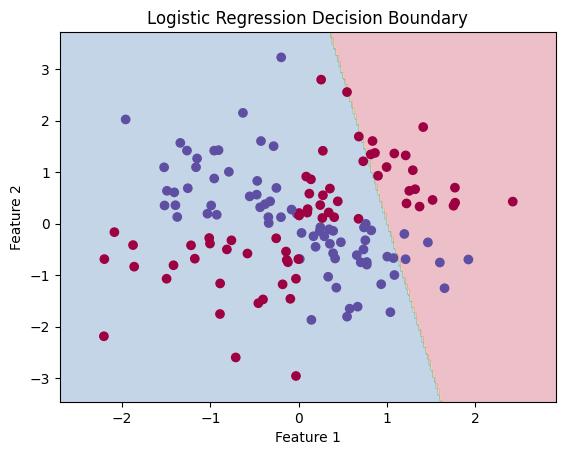

In [205]:
# Logistic regression model 의 decision boundary와 data를 2d 상에서 확인할 수 있도록 plot을 생성하시오.

import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid of points to evaluate the decision boundary
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Flatten the mesh grid and create a tensor
mesh_input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()

# Make predictions for each point in the mesh
with torch.no_grad():
    mesh_output = model_lr(mesh_input).argmax(dim=1).reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, mesh_output, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


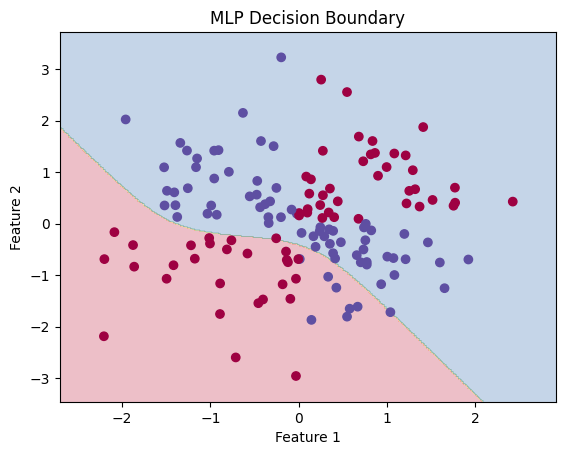

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Create a mesh grid of points to evaluate the decision boundary
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Flatten the mesh grid and create a tensor
mesh_input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()

# Make predictions for each point in the mesh
with torch.no_grad():
    mesh_output = model_mlp(mesh_input).argmax(dim=1).reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, mesh_output, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.title('MLP Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [183]:
# logistic regression model이 non-linear function인 sigmoid를 사용하는데 linear classifier로 분류하나? Decisino boundary 관점에서 설명하시오

# 그 이유는 classification할 때 hyperplane의 형태가 선형형태인지 아닌지에 따라 linear method인지 아닌지 구분하기 때문에
# 위에서 확인한 것 처럼 decision boundary가 선형형태인 logistic regression 또한 linear classifier로 분류된다.